In [ ]:
pip install ydata_profiling

## De inicio serão utilizadas as seguintes bibliotecas para uma análise inicial

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt


# Entendimento dos dados

In [ ]:
df = pd.read_csv("streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


## Verificando as estatísticas e formato dos dados

In [ ]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


### Como a coluna "User_id" não contribuíra para a análise será removida

In [ ]:
df = df.drop(["User_id"], axis=1)

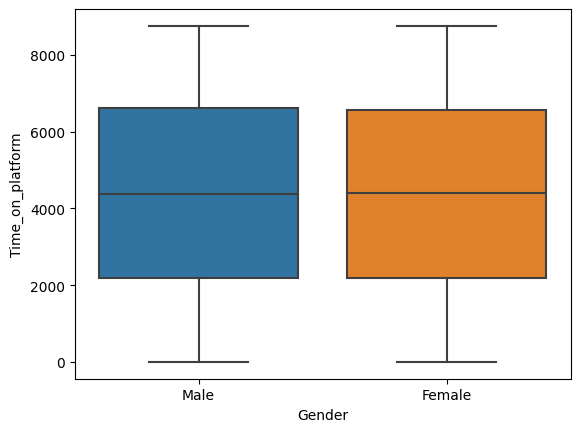

In [ ]:
# Gráfico para verificar se existe diferença entre os gêneros em relação ao tempo assistido
sns.boxplot(x='Gender', y='Time_on_platform', data=df)
plt.show()

#Utilizando a biblioteca "pandas_profiling" para verificar :
###As variáveis separadamente.
###Vericar se há dados nulos ou duplicados.
###As correlações e interações entre os dados.

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Segundo a análise é possivel afirmar:
###1 - Há valores duplicados e nulos.
###2 - A grande maioria das colunas tem dados faltantes.
###3 - A princípio os dados possuem correlações muito fracas ou inexistentes.


# Preparação dos dados

In [ ]:
colunas = ["Time_on_platform", "Num_streaming_services", "Churned", "Avg_rating", "Devices_connected"]
df[colunas] = df[colunas].fillna(0)


##Identificando e removendo valores duplicados

In [ ]:
# Identificar valores duplicados
df[df.duplicated(keep=False)]

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0
7,56.0,Male,462.0,1.0,NaN,3.0,4,3.74,1.0
8,25.0,Female,3783.0,3.0,NaN,1.0,2,2.92,0.0
20,20.0,Male,2542.0,5.0,Basic,0.0,1,0.00,1.0
21,18.0,Female,4796.0,2.0,NaN,0.0,1,0.00,1.0
...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,0.0,0.0,Basic,0.0,5,2.20,0.0
77880,47.0,Female,6176.0,0.0,Premium,0.0,2,4.54,0.0
77881,64.0,Female,0.0,5.0,Premium,0.0,1,4.34,1.0
77882,58.0,Male,1314.0,5.0,Standard,0.0,4,0.00,0.0


In [ ]:
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(10))

n_duplicates
Age Gender Time_on_platform Devices_connected Subscription_type Num_streaming_services Num_active_profiles Avg_rating Churned              
NaN Male   0.0              0.0               Standard          0.0                    3                   0.0        0.0                 8
                                              NaN               0.0                    3                   0.0        0.0                 6
    Female 0.0              2.0               NaN               0.0                    3                   0.0        0.0                 6
    NaN    0.0              0.0               Basic             0.0                    1                   0.0        0.0                 6
    Female 0.0              4.0               NaN               0.0                    3                   0.0        0.0                 6
    Male   0.0              2.0               Basic             0.0                    1                   0.0        0.0                 6
                            0.0               Basic             0.0                    2                   0.0        0.0                 6
                            2.0               Standard          0.0                    5                   0.0        0.0                 6
    Female 0.0              0.0               Premium           0.0                    3                   0.0        0.0                 6
                                              Standard          0.0                    1                   0.0        0.0                 6

In [ ]:
# Eliminando os valores duplicados
df=df.drop_duplicates()

# Identificando e removendo valores nulos

In [ ]:
# Identificar e mostrar valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
Subscription_type,20995,32.29%
Gender,12125,18.65%
Age,9249,14.22%
Time_on_platform,0,0.00%
Devices_connected,0,0.00%
Num_streaming_services,0,0.00%
Num_active_profiles,0,0.00%
Avg_rating,0,0.00%
Churned,0,0.00%


In [ ]:
#Removendo as linhas nulas nas colunas especificadas
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])


##Transformando valores floats em valores inteiros


In [ ]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
dtype: object

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
df['Avg_rating'] = df['Avg_rating'].astype(int)
df['Avg_rating'] = df['Avg_rating'].round().astype(int)
df['Churned'] = df['Churned'].astype(int)



<ipython-input-62-7d5d0de20580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
<ipython-input-62-7d5d0de20580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_on_platform'] = df['Time_on_platform'].astype(int)
<ipython-input-62-7d5d0de20580>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49,Male,4700,3,Basic,0,3,0,0
1,69,Female,6107,2,Standard,0,1,2,0
2,44,Male,6374,3,Premium,1,1,1,1
3,26,Male,0,5,Basic,0,2,0,0
5,54,Male,3024,2,Basic,0,1,0,0


In [ ]:
df.loc[:, 'Churned'] = df.loc[:, 'Churned'].replace({0: 'No', 1: 'Yes'})



### Agora todos os dados estão devidamente tratados

#  Modelagem dos Dados - Regressão Logística

In [ ]:
X = df.drop(["Churned"], axis=1)

y = df[["Churned"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crie uma instância do LabelEncoder
le = LabelEncoder()
le.fit(y['Churned'])
y = y.copy()
y.loc[:, 'Churned'] = le.transform(y['Churned'])


In [ ]:
X = pd.get_dummies(X)

In [ ]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=42)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.607843,0.536591,0.6,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.697226,0.4,0.00,0.00,0.4,1.0,0.0,0.0,0.0,1.0
2,0.509804,0.727709,0.6,0.25,0.00,0.2,0.0,1.0,0.0,1.0,0.0
3,0.156863,0.000000,1.0,0.00,0.25,0.0,0.0,1.0,1.0,0.0,0.0
4,0.705882,0.345245,0.4,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
30631,0.588235,0.000000,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,1.0
30632,0.274510,0.000000,0.2,0.00,0.00,0.8,1.0,0.0,0.0,0.0,1.0
30633,0.745098,0.192830,0.8,0.00,0.25,0.0,1.0,0.0,1.0,0.0,0.0
30634,0.823529,0.849983,0.0,0.00,0.25,0.8,1.0,0.0,0.0,1.0,0.0


In [ ]:
y


,Churned
0,0
1,0
2,1
3,0
5,0
...,...
65461,1
65466,1
65468,0
65469,0


## Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
X_test.assign(Churned = y_test).assign(y_pred = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,Churned,y_pred
28398,0.215686,0.230277,0.4,0.0,0.50,0.2,0.0,1.0,0.0,1.0,0.0,NaN,0
16769,0.843137,0.131522,0.0,0.5,1.00,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
24445,0.274510,0.368307,0.0,0.0,1.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
30472,0.235294,0.912890,1.0,0.0,0.75,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
6526,0.960784,0.896906,0.0,1.0,0.75,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24408,0.509804,0.000000,0.8,0.0,0.00,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0
29661,0.862745,0.620961,0.2,0.0,0.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
11847,0.803922,0.082315,1.0,0.5,1.00,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
7167,0.431373,0.699623,0.2,0.0,0.75,0.8,0.0,1.0,1.0,0.0,0.0,NaN,0


In [ ]:
predictions = y_pred

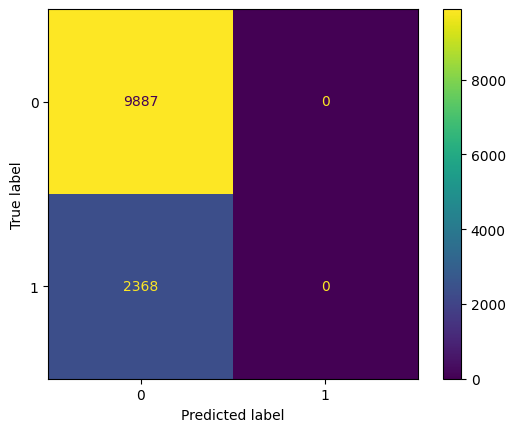

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8045264131440074
Acurácia (Teste): 0.8067727458180335
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.513582192661007
ROCAUC (Teste): 0.4975639421407855


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=300, n_jobs=-1,random_state=0)

In [ ]:
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
X_test.assign(Churned = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,Churned,label
28398,0.215686,0.230277,0.4,0.0,0.50,0.2,0.0,1.0,0.0,1.0,0.0,NaN,0
16769,0.843137,0.131522,0.0,0.5,1.00,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
24445,0.274510,0.368307,0.0,0.0,1.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
30472,0.235294,0.912890,1.0,0.0,0.75,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
6526,0.960784,0.896906,0.0,1.0,0.75,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24408,0.509804,0.000000,0.8,0.0,0.00,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0
29661,0.862745,0.620961,0.2,0.0,0.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
11847,0.803922,0.082315,1.0,0.5,1.00,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
7167,0.431373,0.699623,0.2,0.0,0.75,0.8,0.0,1.0,1.0,0.0,0.0,NaN,0


In [ ]:
predictions = y_pred

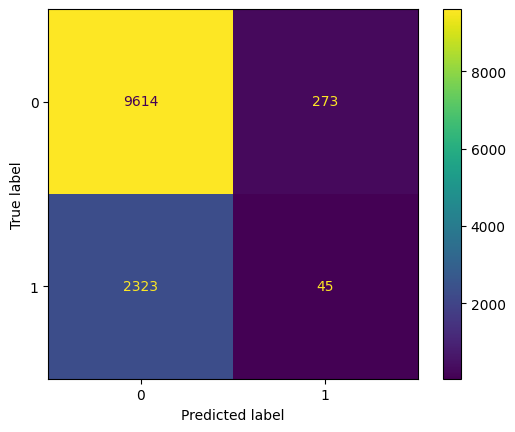

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9955932756650889
Acurácia (Teste): 0.7881680946552427
Acurácia Balanceada (Treino): 0.9890441272178847
Acurácia Balanceada (Teste): 0.4956956813000418
Precision (Treino): 0.9991472427515634
Precision (Teste): 0.14150943396226415
Recall (Treino): 0.9782911216253827
Recall (Teste): 0.01900337837837838
F1-Score (Treino): 0.9886091970187033
F1-Score (Teste): 0.03350707371556218
ROCAUC (Treino): 0.9999375814978799
ROCAUC (Teste): 0.4908360589526514


# Tunning

In [ ]:
#Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 1, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 100, n_jobs = -1,
                                     oob_score = False, random_state = 0,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=1, n_jobs=-1, random_state=0)

In [ ]:
rf_tunned.fit(X_train, y_train)

<ipython-input-94-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=1, n_jobs=-1, random_state=0)

In [ ]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(Churned = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,Churned,label
28398,0.215686,0.230277,0.4,0.0,0.50,0.2,0.0,1.0,0.0,1.0,0.0,NaN,0
16769,0.843137,0.131522,0.0,0.5,1.00,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0
24445,0.274510,0.368307,0.0,0.0,1.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
30472,0.235294,0.912890,1.0,0.0,0.75,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
6526,0.960784,0.896906,0.0,1.0,0.75,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24408,0.509804,0.000000,0.8,0.0,0.00,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0
29661,0.862745,0.620961,0.2,0.0,0.00,0.2,0.0,1.0,1.0,0.0,0.0,NaN,0
11847,0.803922,0.082315,1.0,0.5,1.00,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
7167,0.431373,0.699623,0.2,0.0,0.75,0.8,0.0,1.0,1.0,0.0,0.0,NaN,0


In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8045264131440074
Acurácia (Teste): 0.8067727458180335
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5260551182945892
ROCAUC (Teste): 0.5032884901754693
